## **Промежуточная аттестация 2**

Набор данных представляет собой выборку значений

## Подготовка данных

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [7]:
X = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/aac82bb28386cf65737fe0917d4a01ee/asset-v1:ITMO+bonus_track_methods+2023+type@asset+block/itog_sample_7.csv', names=['X'])
X

,X
0,16.239555
1,19.130044
2,19.229063
3,19.559497
4,19.461068
...,...
495,19.295736
496,21.855823
497,18.984208
498,20.234895


## 1. Выборочные характеристики

Найдем выборочные характеристики X̅, *D*

In [8]:
X_ = round(X['X'].mean(), 3)
D = round(X['X'].var(), 3)
print(f'X̅: {X_}, D:{D}')

X̅: 19.923, D:4.108


## 2. Гистограмма

Построим гистограмму (10 равных интервалов) как оценку плотности распределения и на ее основе сделаем предположение о типе распределения

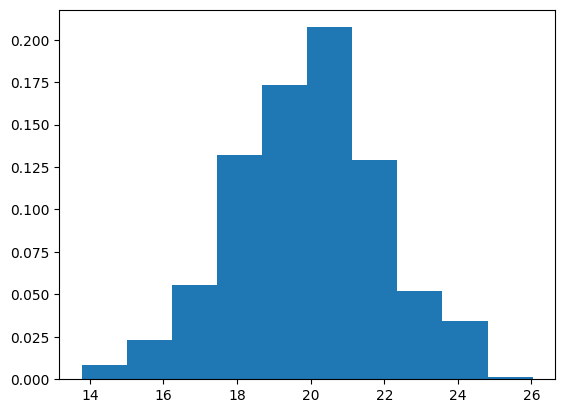

In [26]:
plt.hist(X['X'], bins=10, density=True)
plt.show()

Предположим, что имеем дело со **стандартным нормальным распределением**

 Посмотрим на кол-во элементов выборки в каждом интервале

In [38]:
bins = np.linspace(X['X'].min(), X['X'].max(), 10+1)
hist, _ = np.histogram(X['X'], bins=bins)

for i in range(len(hist)):
  print(f'Интервал {i+1}: {hist[i]} элементов')

Интервал 1: 5 элементов
Интервал 2: 14 элементов
Интервал 3: 34 элементов
Интервал 4: 81 элементов
Интервал 5: 106 элементов
Интервал 6: 127 элементов
Интервал 7: 79 элементов
Интервал 8: 32 элементов
Интервал 9: 21 элементов
Интервал 10: 1 элементов


## 3. Точечные оценки параметров распределения

Опираясь на предположение о **нормальном** типе распределения, найдем точечные оценки θ̂ параметров распределения.

In [39]:
teta1 = X_
teta2 = D
print(f'θ̂1: {teta1}, θ̂2: {teta2}')

θ̂1: 19.923, θ̂2: 4.108


## 4. Интервальные оценки параметров распределения

Построим точные доверительные интервалы для параметров распредления при уровне значимости 𝜉 = 0.05

Для θ̂1:

In [50]:
eps = 0.05

n = len(X)
sigma = X['X'].std()
SE = sigma / np.sqrt(n)

z = round(stats.norm.ppf(eps / 2), 2)
teta1_lower = round(teta1 + z * SE, 3)
teta1_upper = round(teta1 - z * SE, 3)

print(f'Доверительный интервал для θ̂1: {teta1_lower, teta1_upper}')

Доверительный интервал для θ̂1: (19.745, 20.101)


Для θ̂2:

In [53]:
chi2_lower = stats.chi2.ppf(eps / 2, n - 1)
chi2_upper = stats.chi2.ppf(1 - eps / 2, n - 1)

teta2_lower = round((n - 1) * teta2 / chi2_upper, 3)
teta2_upper = round((n - 1) * teta2 / chi2_lower, 3)

print(f'Доверительный интервал для θ̂2: {teta2_lower, teta2_upper}')

Доверительный интервал для θ̂2: (3.642, 4.669)
